In [1]:
import time
import numpy as np
from numpy import *
import matplotlib.pylab as plt
import operator
import pyscf
from pyscf import gto, scf, dft, tddft, data


elements = ['H' , 'He', 'Li', 'Be', 'B' , 'C' , 'N' , 'O' , 'F' , 'Ne',
    'Na', 'Mg', 'Al', 'Si', 'P' , 'S' , 'Cl', 'Ar', 'K' , 'Ca',
    'Sc', 'Ti', 'V' , 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn',
    'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y' , 'Zr',
    'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn',
    'Sb', 'Te', 'I' , 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
    'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
    'Lu', 'Hf', 'Ta', 'W' , 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg',
    'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th',
    'Pa', 'U' , 'Np', 'Pu'] 
hardness = [
0.47259288,
0.92203391,
0.17452888,
0.25700733,
0.33949086,
0.42195412,
0.50438193,
0.58691863,
0.66931351,
0.75191607,
0.17964105,
0.22157276,
0.26348578,
0.30539645,
0.34734014,
0.38924725,
0.43115670,
0.47308269,
0.17105469,
0.20276244,
0.21007322,
0.21739647,
0.22471039,
0.23201501,
0.23933969,
0.24665638,
0.25398255,
0.26128863,
0.26859476,
0.27592565,
0.30762999,
0.33931580,
0.37235985,
0.40273549,
0.43445776,
0.46611708,
0.15585079,
0.18649324,
0.19356210,
0.20063311,
0.20770522,
0.21477254,
0.22184614,
0.22891872,
0.23598621,
0.24305612,
0.25013018,
0.25719937,
0.28784780,
0.31848673,
0.34912431,
0.37976593,
0.41040808,
0.44105777,
0.05019332,
0.06762570,
0.08504445,
0.10247736,
0.11991105,
0.13732772,
0.15476297,
0.17218265,
0.18961288,
0.20704760,
0.22446752,
0.24189645,
0.25932503,
0.27676094,
0.29418231,
0.31159587,
0.32902274,
0.34592298,
0.36388048,
0.38130586,
0.39877476,
0.41614298,
0.43364510,
0.45104014,
0.46848986,
0.48584550,
0.12526730,
0.14268677,
0.16011615,
0.17755889,
0.19497557,
0.21240778,
0.07263525,
0.09422158,
0.09920295,
0.10418621,
0.14235633,
0.16394294,
0.18551941,
0.22370139]
HARDNESS = dict(zip(elements,hardness))

In [2]:
mol = gto.Mole()
mol.build(atom = 'C         -5.14247        3.17333        0.00000;\
#O         -4.07247        3.17333        0.00000;\
#H         -5.49914        2.49946       -0.75072;\
#H         -5.49914        4.16041       -0.20823;\
#H         -5.49914        2.86013        0.95895;\
#H         -3.74914        3.45727       -0.86933', basis = 'def2-SVP', symmetry = True)

In [3]:
mf = dft.RKS(mol) #mf is ground density?
mf.xc = 'b3lyp'
mf.kernel()  #single point energy

converged SCF energy = -37.7234798075852


-37.723479807585214

In [4]:
td = tddft.TDA(mf)
start = time.time()
td.kernel()    #compute first few excited states.
end = time.time()
print ('Pyscf time =', round(end-start,4))

Excited State energies (eV)
[11.53588533 25.41647937 51.02603713]
Pyscf time = 0.0764


In [5]:
#print (mol.atom_pure_symbol(0))
#to return pure element symbol only, no special characters


In [6]:
AO = [int(i.split(' ',1)[0]) for i in mol.ao_labels()] 
# .split(' ',1) is to split each element by space, split once.
# mol.ao_labels() it is a list of all AOs and corresponding atom_id, AO is a list of atom_id
#[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]


N_bf = len(AO)
#print (AO) 

In [7]:
mf.analyze()
##MO energies
Natm = mol.natm #number of atoms
MOe = mf.mo_energy #an array of MO energies


occupied = len(np.where(mf.mo_occ==2)[0])
#mf.mo_occ is an array of occupance [2,2,2,2,2,0,0,0,0.....]
virtual = N_bf - occupied
print (occupied, virtual, N_bf)


TODO: total wave-function symmetry for Dooh
occupancy for each irrep:    A1g E1gx E1gy  A1u E1uy E1ux E2gx E2gy
                               2    0    0    1    0    0    0    0
**** MO energy ****
MO #1 (A1g #1), energy= -10.3176191933011 occ= 2
MO #2 (A1g #2), energy= -0.527681034910241 occ= 2
MO #3 (A1u #1), energy= -0.203896410073949 occ= 2
MO #4 (E1uy #1), energy= -0.141748819825121 occ= 0
MO #5 (E1ux #1), energy= -0.141748819825121 occ= 0
MO #6 (A1g #3), energy= 0.351484745023736 occ= 0
MO #7 (E1uy #2), energy= 0.47913401647788 occ= 0
MO #8 (E1ux #2), energy= 0.479134016477879 occ= 0
MO #9 (A1u #2), energy= 0.486373674033411 occ= 0
MO #10 (E2gy #1), energy= 1.65569587849078 occ= 0
MO #11 (E2gx #1), energy= 1.65569695662062 occ= 0
MO #12 (E1gx #1), energy= 1.67429534765711 occ= 0
MO #13 (E1gy #1), energy= 1.67429534765711 occ= 0
MO #14 (A1g #4), energy= 1.69692372747356 occ= 0
 ** Mulliken atomic charges  **
charge of  0C =      0.00000
Dipole moment(X, Y, Z, Debye): -0.00000,  

In [8]:
#mf.mulliken_pop_meta_lowdin_ao()
#population analysis

In [28]:
#nocc = mol.nelectron 
# mol.nelectron is number of electrons, not necessary the number of MOs

#C = pyscf.lo.orth.orth_ao(mol, method = 'lowdin')

C = mf.mo_coeff 
# mf.mo_coeff is the coefficient matrix


S = np.dot(np.linalg.inv(C.T), np.linalg.inv(C))

#S = mf.get_ovlp() #.get_ovlp()  is not basis overlap matrix

# print (np.linalg.norm(S1-S2))

s,ket = np.linalg.eig(S)
#s are eigenvalues, must be all positive
#each column of ket is a eigenket
#print (s)
s = s**0.5
X = np.linalg.multi_dot([ket,np.diag(s),ket.T])
#X == S^1/2

C = np.dot(X,C)
# #now C is orthogonzalized
# print (np.round(C,2))


In [29]:
def generateQ (atom_id):
    q = np.zeros([N_bf, N_bf])
    #q is same size with C
    for i in range (0, N_bf):
        for p in range (0, N_bf):
            #for a certain element q[i,p]
            #first two loops is to iterate all ith and pth column of C
            for mu in AO: 
                # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
                if mu == atom_id:
                    q[i,p] += C[mu,i]*C[mu,p]
    return q

Qmatrix = [(generateQ(atom_id)) for atom_id in range (0, Natm)]
#a list of q matrix

# plt.matshow(q_atom_0)
# plt.show()

#print (np.round(q_atom_0.diagonal(),2))
#print (np.round(q_atom_0,2))



In [30]:
a_x = 0.25

beta1=0.2
beta2=1.83

alpha1=1.42
alpha2=0.48

beta = beta1 + beta2 * a_x
alpha = alpha2 + alpha2 * a_x

print (beta, alpha)

0.6575 0.6


In [31]:
#function to return distance between two atoms
def R (atom_A_id, atom_B_id):
    a = mol.atom_coord(atom_A_id) #coordinates of atom A
    b = mol.atom_coord(atom_B_id) #coordinates of atom B
    distance = np.linalg.norm (a - b)
    return distance
#(mol.atom_coord(atom_id)) is to return the coordinates of a certain atom, it is a ndarray

In [32]:
#function to return chemical hardness from dictionary HARDNESS
def Hardness (atom_id):
    atom = mol.atom_pure_symbol(atom_id) 
    #the symbol of atom looked at
    return HARDNESS[atom]
# print (Hardness (1))
# print (Hardness (0))

In [33]:
def eta (atom_A_id, atom_B_id):
    eta = (Hardness(atom_A_id) + Hardness(atom_B_id))/2
    return eta
#eta(0,1)

In [34]:
def gammaJ(atom_A_id, atom_B_id):
    gamma_A_B_J = (1/(R(atom_A_id, atom_B_id)**beta + (a_x*eta(atom_A_id, atom_B_id))**(-beta)))**(1/beta)
    return gamma_A_B_J
#gammaJ (2,1)

In [35]:
def gammaK(atom_A_id, atom_B_id):
    gamma_A_B_K = (1/(R(atom_A_id, atom_B_id)**alpha \
                   + eta(atom_A_id, atom_B_id)**(-alpha)))\
                    **(1/alpha)
    return gamma_A_B_K
#gammaK (2,1)

In [36]:
#define two electron intergeral (pq|rs)
def ele_int (p,q,r,s):
    pqrs = 0
    if q <= occupied:
        for atom_A_id in range (0, Natm):
            for atom_B_id in range (0, Natm):
                pqrs += Qmatrix[atom_A_id][p,q] * Qmatrix[atom_B_id][r,s] * gammaJ(atom_A_id, atom_B_id)
                #(ij|ab)
    else:
        for atom_A_id in range (0, Natm):
            for atom_B_id in range (0, Natm):
                pqrs += Qmatrix[atom_A_id][p,q] * Qmatrix[atom_B_id][r,s] * gammaK(atom_A_id, atom_B_id)
                #(ia|jb)
    return pqrs
ele_int (1,2,3,5)

0.0

In [37]:
def delta (a, b):
    if a == b:
        return 1
    else:
        return 0
delta(4,2)

0

In [38]:
A = np.zeros ([occupied*virtual, occupied*virtual])
np.shape(A)

(33, 33)

In [39]:
#build A matrix
m = -1
for i in range (0, occupied):
    for a in range (occupied, N_bf):
        m += 1 
        #for each occupied-virtial orbital combination, it corresponds to a certain row
        n = -1
        for j in range (0, occupied):
            for b in range (occupied, N_bf):
                n +=1
            #for each occupied-virtial orbital combination, it corresponds to a certain column
                A[m,n] = delta(i,j) * delta(a,b) * (MOe[a] - MOe[i]) \
                            + 2 * ele_int(i,a,j,b) - ele_int(i,j,a,b)
print (m,n)

32 32


In [43]:
#check whether A is symmetric
def check_symmetric(a, tol=1e-8):
    return np.all(np.abs(a-a.T) < tol)
print (check_symmetric(A, tol=1e-8))

True


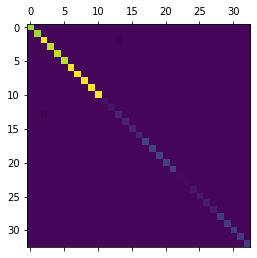

In [40]:
plt.matshow(A)
plt.show()

In [44]:
#print (np.round(A,2))
eigv,eigk = np.linalg.eigh(A)
#eigh guarantees you that the eigenvalues are sorted and uses a faster algorithm 
#that takes advantage of the fact that the matrix is symmetric. 

In [45]:
print (eigv[:5]*27.21138624598853)
# ':n', first n elements; 'n:' all elements except firt n 

[ 1.69112208  1.69112208 10.50175057 10.50175057 15.11269113]


size of Z is 33


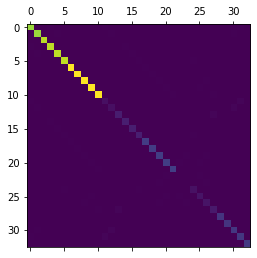

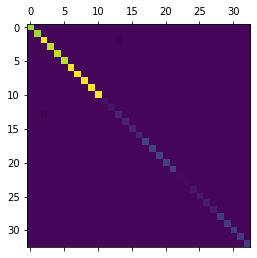

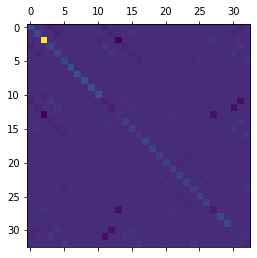

In [48]:
#this block is to reprocude the TDA A matrix
vind, hdiag = td.gen_vind(mf)
n = len(hdiag)
print ('size of Z is', n)
Z = np.zeros((n,n))
I = np.eye(n)
for i in range (0,n):
    Z[:,i] = vind (I[:,i])
plt.matshow(Z)
plt.show() #visualize the matrix

plt.matshow(A)
plt.show()

D = A - Z
plt.matshow(D)
plt.show()